# Milestone Project 1: Food Vision Big

## Check GPU

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1650 Ti (UUID: GPU-ff183205-244d-e5aa-6214-59c049bddd64)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-23 11:13:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10,01K  --.-KB/s    in 0,005s  

2024-04-23 11:13:07 (1,95 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [6]:
from helper_functions import *

ImportError: /home/lolka0d/anaconda3/envs/notebooks/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/lolka0d/anaconda3/envs/notebooks/lib/python3.11/site-packages/tensorflow/python/platform/../../libtensorflow_framework.so.2)

## Use TensorFlow Datasets to download data

In [4]:
# Get TensorfFlow datasets
import tensorflow_datasets as tfds

In [5]:
datasets_list = tfds.list_builders() # all avalilable datasets
print("food101" in datasets_list)

True


In [7]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(
  "food101",
  split=["train", "validation"],
  shuffle_files=True,
  as_supervised=True, # data gets returned in tuple format
  with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: 

In [19]:
# Features of Food101 from TFDS
ds_info.features, ds_info.splits

(FeaturesDict({
     'image': Image(shape=(None, None, 3), dtype=uint8),
     'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
 }),
 {'train': <SplitInfo num_examples=75750, num_shards=32>,
  'validation': <SplitInfo num_examples=25250, num_shards=16>})

,image,label
0,,90 (spaghetti_bolognese)
1,,3 (beef_carpaccio)
2,,93 (steak)
3,,79 (prime_rib)

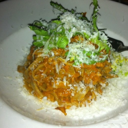
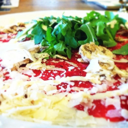
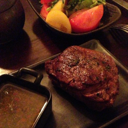
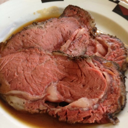

In [16]:
tfds.as_dataframe(train_data.take(4), ds_info)

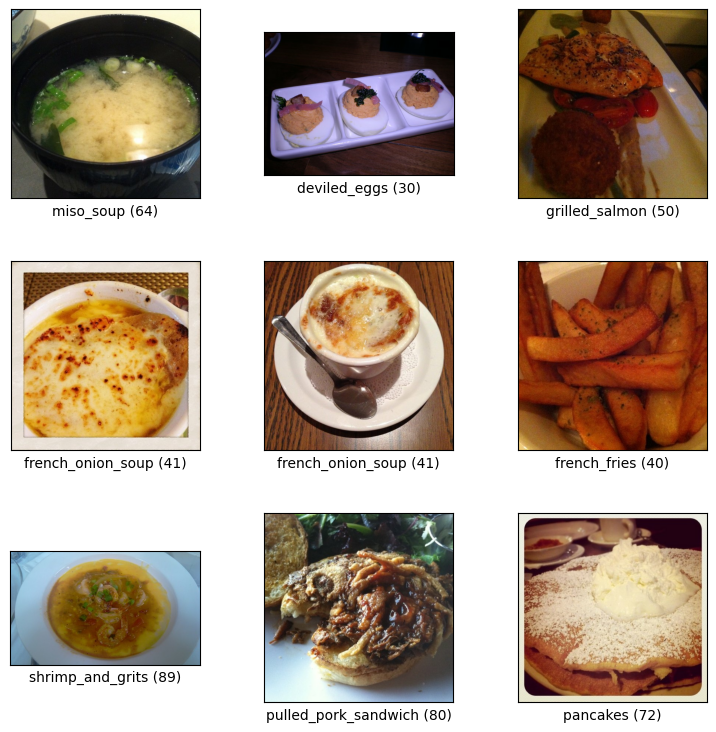

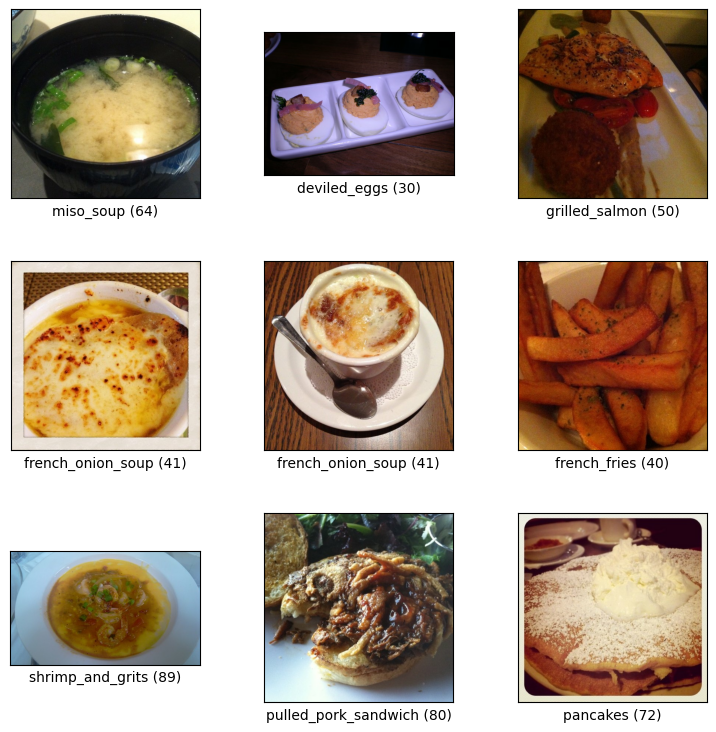

In [18]:
tfds.show_examples(train_data, ds_info)

In [21]:
class_names = ds_info.features["label"].names
len(class_names)

101